<a href="https://colab.research.google.com/github/rsakthivel08/Amazon-Product-Recommendation-System/blob/main/Recomendation_System_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

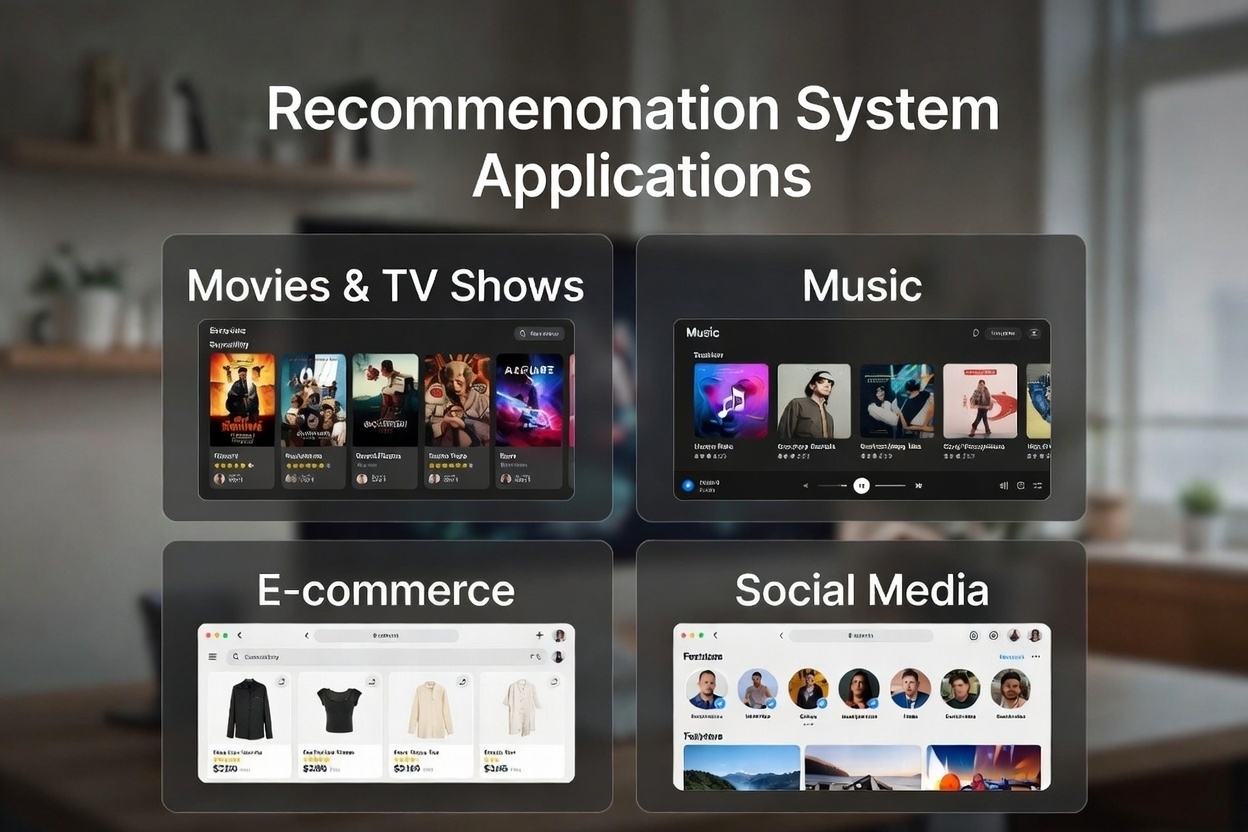






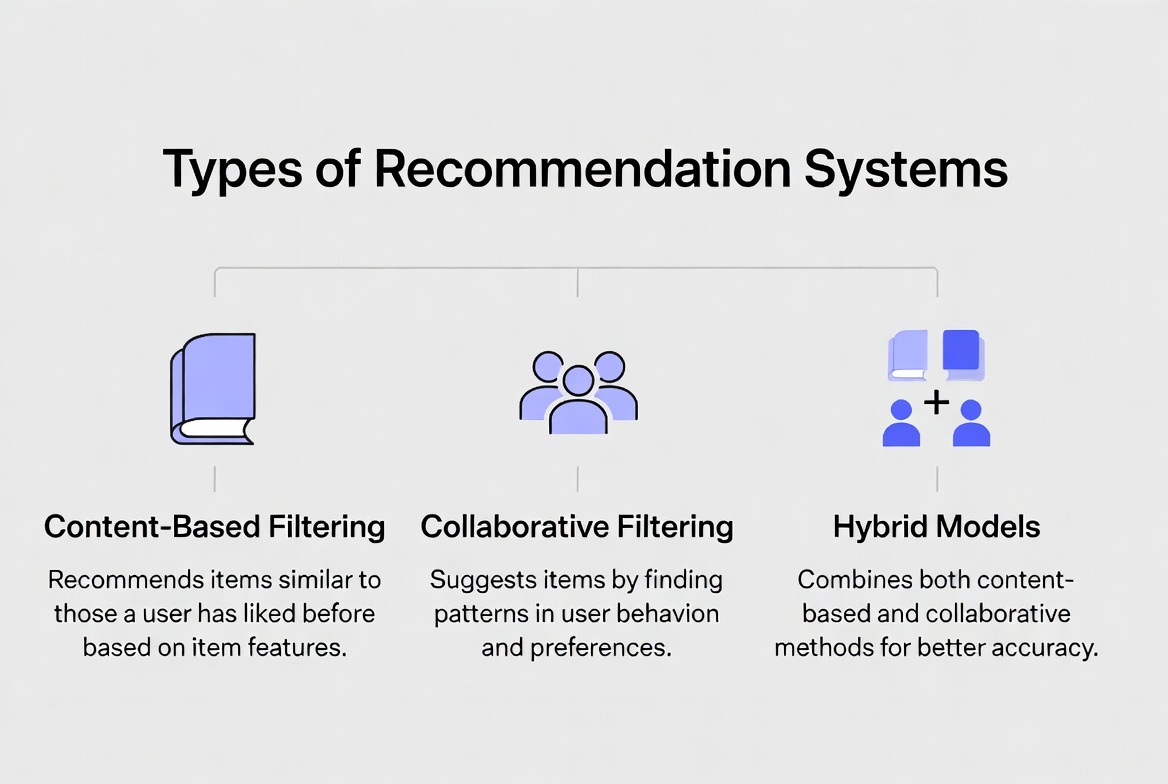

# AMAZON Product Recommendation



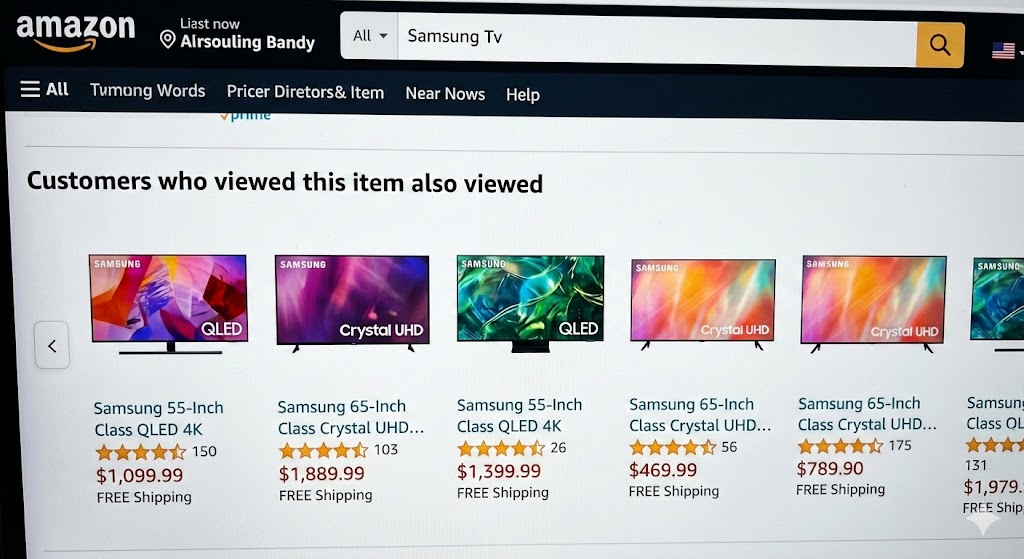



### Step 0: Download the Dataset from the Given Link

[AMAZON Product Dataset](https://drive.google.com/file/d/1T-QCM6KHhknQQxdxvK1lHkMgY8kDuiVx/view?usp=sharing)




### Step:1 Install The Required Packages ⚙

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

### Step: 2 Import The Required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Step:3 Load The Amazon Product DataSet

In [ ]:
df=pd.read_csv('amazon_products_sample.csv')
df.head()

product_id                               product_name    brand  \
0  B0VK7D0SXO                              iPhone 15 Neo    Apple   
1  B0QWW6P3IT                  Football FIFA Quality Pro     Nike   
2  B0751UC2JB                    OLED evo C3 65-inch Neo       LG   
3  B0SDDAWO7V                          Blazer Dress Plus      AND   
4  B0FAJFHDXK  Sapiens: A Brief History of Humankind Max  Penguin   

           category         subcategory  \
0       Electronics         Smartphones   
1  Sports & Fitness  Sports Accessories   
2       Electronics         Televisions   
3           Fashion    Women's Clothing   
4             Books         Non-Fiction   

                                         description   price     mrp  \
0  Dynamic Island, 48MP camera, A16 Bionic chip f...  100617  106913   
1  Match-quality ball with 12-panel design and te...    2814    3377   
2  Self-lit OLED pixels with α9 Gen6 AI Processor...  147381  164722   
3  Power dressing blazer dress with structured sh...    5329    7461   
4  Yuval Noah Harari's exploration of human history.     539     720   

   discount_percentage  rating  ...    seller_name seller_rating  \
0                    6     4.0  ...  TrueComRetail           3.8   
1                   17     4.2  ...    SuperComNet           4.1   
2                   11     4.3  ...   Spigen India           4.4   
3                   29     3.9  ...   Spigen India           4.4   
4                   25     4.1  ...  ETrade Online           3.7   

          seller_type prime_eligible  in_stock stock_quantity  \
0  Marketplace Seller          False     False              0   
1      Official Store          False      True            273   
2         Brand Store          False      True             53   
3         Brand Store           True      True            120   
4  Marketplace Seller           True      True             30   

                                            keywords  listing_date  \
0      iphone, latest, apple, best, smartphones, neo    2024-11-26   
1  fifa, fitness, sports, football, accessories, ...    2023-12-22   
2     65-inch, oled, televisions, evo, sale, lg, new    2022-06-16   
3  plus, womens, trendy, fashion, blazer, clothin...    2024-09-10   
4  brief, penguin, sapiens:, popular, must read, ...    2024-06-19   

                                           image_url  \
0  https://m.media-amazon.com/images/I/B0VK7D0SXO...   
1  https://m.media-amazon.com/images/I/B0QWW6P3IT...   
2  https://m.media-amazon.com/images/I/B0751UC2JB...   
3  https://m.media-amazon.com/images/I/B0SDDAWO7V...   
4  https://m.media-amazon.com/images/I/B0FAJFHDXK...   

                                        Combine_Text  
0  iPhone 15 Neo Apple Electronics Smartphones Dy...  
1  Football FIFA Quality Pro Nike Sports & Fitnes...  
2  OLED evo C3 65-inch Neo LG Electronics Televis...  
3  Blazer Dress Plus AND Fashion Women's Clothing...  
4  Sapiens: A Brief History of Humankind Max Peng...  

[5 rows x 23 columns]

### Step:4 Combined The Key Columns For Recommendation

In [ ]:
df['Combine_Text']=df['product_name']+' '+df['brand']+' '+df['category']+' '+df['subcategory']+' '+df['description']+' '+df['keywords']
df.head()

product_id                               product_name    brand  \
0  B0VK7D0SXO                              iPhone 15 Neo    Apple   
1  B0QWW6P3IT                  Football FIFA Quality Pro     Nike   
2  B0751UC2JB                    OLED evo C3 65-inch Neo       LG   
3  B0SDDAWO7V                          Blazer Dress Plus      AND   
4  B0FAJFHDXK  Sapiens: A Brief History of Humankind Max  Penguin   

           category         subcategory  \
0       Electronics         Smartphones   
1  Sports & Fitness  Sports Accessories   
2       Electronics         Televisions   
3           Fashion    Women's Clothing   
4             Books         Non-Fiction   

                                         description   price     mrp  \
0  Dynamic Island, 48MP camera, A16 Bionic chip f...  100617  106913   
1  Match-quality ball with 12-panel design and te...    2814    3377   
2  Self-lit OLED pixels with α9 Gen6 AI Processor...  147381  164722   
3  Power dressing blazer dress with structured sh...    5329    7461   
4  Yuval Noah Harari's exploration of human history.     539     720   

   discount_percentage  rating  ...    seller_name seller_rating  \
0                    6     4.0  ...  TrueComRetail           3.8   
1                   17     4.2  ...    SuperComNet           4.1   
2                   11     4.3  ...   Spigen India           4.4   
3                   29     3.9  ...   Spigen India           4.4   
4                   25     4.1  ...  ETrade Online           3.7   

          seller_type prime_eligible  in_stock stock_quantity  \
0  Marketplace Seller          False     False              0   
1      Official Store          False      True            273   
2         Brand Store          False      True             53   
3         Brand Store           True      True            120   
4  Marketplace Seller           True      True             30   

                                            keywords  listing_date  \
0      iphone, latest, apple, best, smartphones, neo    2024-11-26   
1  fifa, fitness, sports, football, accessories, ...    2023-12-22   
2     65-inch, oled, televisions, evo, sale, lg, new    2022-06-16   
3  plus, womens, trendy, fashion, blazer, clothin...    2024-09-10   
4  brief, penguin, sapiens:, popular, must read, ...    2024-06-19   

                                           image_url  \
0  https://m.media-amazon.com/images/I/B0VK7D0SXO...   
1  https://m.media-amazon.com/images/I/B0QWW6P3IT...   
2  https://m.media-amazon.com/images/I/B0751UC2JB...   
3  https://m.media-amazon.com/images/I/B0SDDAWO7V...   
4  https://m.media-amazon.com/images/I/B0FAJFHDXK...   

                                        Combine_Text  
0  iPhone 15 Neo Apple Electronics Smartphones Dy...  
1  Football FIFA Quality Pro Nike Sports & Fitnes...  
2  OLED evo C3 65-inch Neo LG Electronics Televis...  
3  Blazer Dress Plus AND Fashion Women's Clothing...  
4  Sapiens: A Brief History of Humankind Max Peng...  

[5 rows x 23 columns]

In [ ]:
df['Combine_Text']

0       iPhone 15 Neo Apple Electronics Smartphones Dy...
1       Football FIFA Quality Pro Nike Sports & Fitnes...
2       OLED evo C3 65-inch Neo LG Electronics Televis...
3       Blazer Dress Plus AND Fashion Women's Clothing...
4       Sapiens: A Brief History of Humankind Max Peng...
                              ...                        
9995    Baby Carrier Neo Chicco Toys & Baby Baby Produ...
9996    Anti-Hair Fall Shampoo Lite Himalaya Beauty & ...
9997    Crop Top Neo Forever 21 Fashion Women's Clothi...
9998    Galaxy A54 5G Max Samsung Electronics Smartpho...
9999    Watermelon Cooling Moisturizer Lite Dot & Key ...
Name: Combine_Text, Length: 10000, dtype: object

### Step:5 Converting the Combine_Text Column into Vectors

In [ ]:
tfidf_object=TfidfVectorizer(stop_words='english',max_features=1500,ngram_range=(1,2)) # Creating TF-IDF Object for Convert Text to Vectors

tfidi_matrix=tfidf_object.fit_transform(df['Combine_Text']) # Convert Text to Vectors

tdidf_df=pd.DataFrame(tfidi_matrix.toarray(),columns=tfidf_object.get_feature_names_out())

tdidf_df.head()

10  10 pack  100  100 pfoa  1000xm5  10l        12  12 hour  12 place  \
0  0.0      0.0  0.0       0.0      0.0  0.0  0.000000      0.0       0.0   
1  0.0      0.0  0.0       0.0      0.0  0.0  0.128817      0.0       0.0   
2  0.0      0.0  0.0       0.0      0.0  0.0  0.000000      0.0       0.0   
3  0.0      0.0  0.0       0.0      0.0  0.0  0.000000      0.0       0.0   
4  0.0      0.0  0.0       0.0      0.0  0.0  0.000000      0.0       0.0   

   12th  ...  years  years updates  yoga  yoga mat  yonex  yonex accessories  \
0   0.0  ...    0.0            0.0   0.0       0.0    0.0                0.0   
1   0.0  ...    0.0            0.0   0.0       0.0    0.0                0.0   
2   0.0  ...    0.0            0.0   0.0       0.0    0.0                0.0   
3   0.0  ...    0.0            0.0   0.0       0.0    0.0                0.0   
4   0.0  ...    0.0            0.0   0.0       0.0    0.0                0.0   

   yonex sports  zara  zara fashion  zinc  
0           0.0   0.0           0.0   0.0  
1           0.0   0.0           0.0   0.0  
2           0.0   0.0           0.0   0.0  
3           0.0   0.0           0.0   0.0  
4           0.0   0.0           0.0   0.0  

[5 rows x 1500 columns]

### Step:6 Create Cosine_Similarity For Recommending The Similar Product

![](https://imagine-public.x.ai/imagine-public/images/1409d463-30ac-471e-aca1-cecef02f8399.jpg)



In [ ]:
Product_cosine_sim=cosine_similarity(tdidf_df,tdidf_df)
Product_cosine_sim

array([[1.        , 0.        , 0.02621446, ..., 0.02024873, 0.11895847,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02621446, 0.        , 1.        , ..., 0.01738763, 0.05326108,
        0.        ],
       ...,
       [0.02024873, 0.        , 0.01738763, ..., 1.        , 0.00902357,
        0.        ],
       [0.11895847, 0.        , 0.05326108, ..., 0.00902357, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Step:7 Recommendation Function

In [ ]:
def recommend_product(qurey,k=5):
  qurey_vec=tfidf_object.transform([qurey]) # Convert Qurey txt to vector
  similarity=cosine_similarity(qurey_vec,tdidf_df).flatten() # Similarity score
### Final Recap
  top_indices=similarity.argsort()[-k:][::-1] # rank the Product and get index by arrangeing similarity score

  result=df.iloc[top_indices] # Pick the Data with top_index
  return result.sort_values(by=['price','rating'],ascending=False) # return the data based on rating or price



### Step:8 Call The recommend_product For Product Recommendation

In [ ]:
recommend_product(input('Enter The Product Detail:'),10)

Enter The Product Detail:Samsung TV


product_id                 product_name    brand     category  \
2281  B0PO5BSFME   Crystal 4K UHD 55-inch Air  Samsung  Electronics   
5989  B0EDZQA8HW    Crystal 4K UHD 55-inch SE  Samsung  Electronics   
3996  B0KXA1RHJF       Crystal 4K UHD 55-inch  Samsung  Electronics   
3281  B0LHAM32GS       Crystal 4K UHD 55-inch  Samsung  Electronics   
9525  B0SQOG6TTN  Crystal 4K UHD 55-inch Plus  Samsung  Electronics   
1463  B02F4Q7YIM   Crystal 4K UHD 55-inch Pro  Samsung  Electronics   
7509  B01D73KTHG   Crystal 4K UHD 55-inch Neo  Samsung  Electronics   
3232  B0VW941P0P   Crystal 4K UHD 55-inch Pro  Samsung  Electronics   
4723  B0YHXUVRMT   Crystal 4K UHD 55-inch Neo  Samsung  Electronics   
9867  B01P40FH1I  Crystal 4K UHD 55-inch Plus  Samsung  Electronics   

      subcategory                                        description  price  \
2281  Televisions  PurColor technology with smart TV features and...  60327   
5989  Televisions  PurColor technology with smart TV features and...  59617   
3996  Televisions  PurColor technology with smart TV features and...  55440   
3281  Televisions  PurColor technology with smart TV features and...  53995   
9525  Televisions  PurColor technology with smart TV features and...  48439   
1463  Televisions  PurColor technology with smart TV features and...  46877   
7509  Televisions  PurColor technology with smart TV features and...  46662   
3232  Televisions  PurColor technology with smart TV features and...  44480   
4723  Televisions  PurColor technology with smart TV features and...  42963   
9867  Televisions  PurColor technology with smart TV features and...  37770   

        mrp  discount_percentage  rating  ...                 seller_name  \
2281  69126                   13     3.7  ...  Appario Retail Private Ltd   
5989  68313                   13     3.2  ...     Cloudtail India Pvt Ltd   
3996  63527                   13     4.0  ...               ETrade Online   
3281  61871                   13     3.2  ...     Cloudtail India Pvt Ltd   
9525  55505                   13     3.7  ...  Appario Retail Private Ltd   
1463  53715                   13     5.0  ...          Cocoblu Retail Ltd   
7509  53468                   13     4.3  ...          Cocoblu Retail Ltd   
3232  50969                   13     4.2  ...        Brand Official Store   
4723  49230                   13     4.8  ...               ETrade Online   
9867  43279                   13     3.8  ...             RetailNet India   

     seller_rating          seller_type prime_eligible  in_stock  \
2281           4.2        Amazon Retail           True      True   
5989           4.3        Amazon Retail           True     False   
3996           3.7   Marketplace Seller          False      True   
3281           4.3        Amazon Retail           True      True   
9525           4.2        Amazon Retail           True      True   
1463           4.0  Authorized Retailer           True      True   
7509           4.0  Authorized Retailer           True      True   
3232           4.5          Brand Store           True      True   
4723           3.7   Marketplace Seller          False      True   
9867           4.0  Authorized Retailer          False      True   

     stock_quantity                                           keywords  \
2281            318  55-inch, crystal, televisions, uhd, latest, sa...   
5989              0  55-inch, crystal, televisions, uhd, latest, sa...   
3996             17  55-inch, crystal, televisions, uhd, latest, sa...   
3281            236  55-inch, crystal, televisions, uhd, latest, sa...   
9525             45  55-inch, crystal, televisions, uhd, latest, sa...   
1463            269  55-inch, crystal, televisions, uhd, latest, sa...   
7509            422  55-inch, crystal, televisions, uhd, latest, sa...   
3232            124  55-inch, crystal, televisions, uhd, latest, sa...   
4723             62  55-inch, crystal, televisions, uhd, latest, sa...   
9867             

### Final Recap

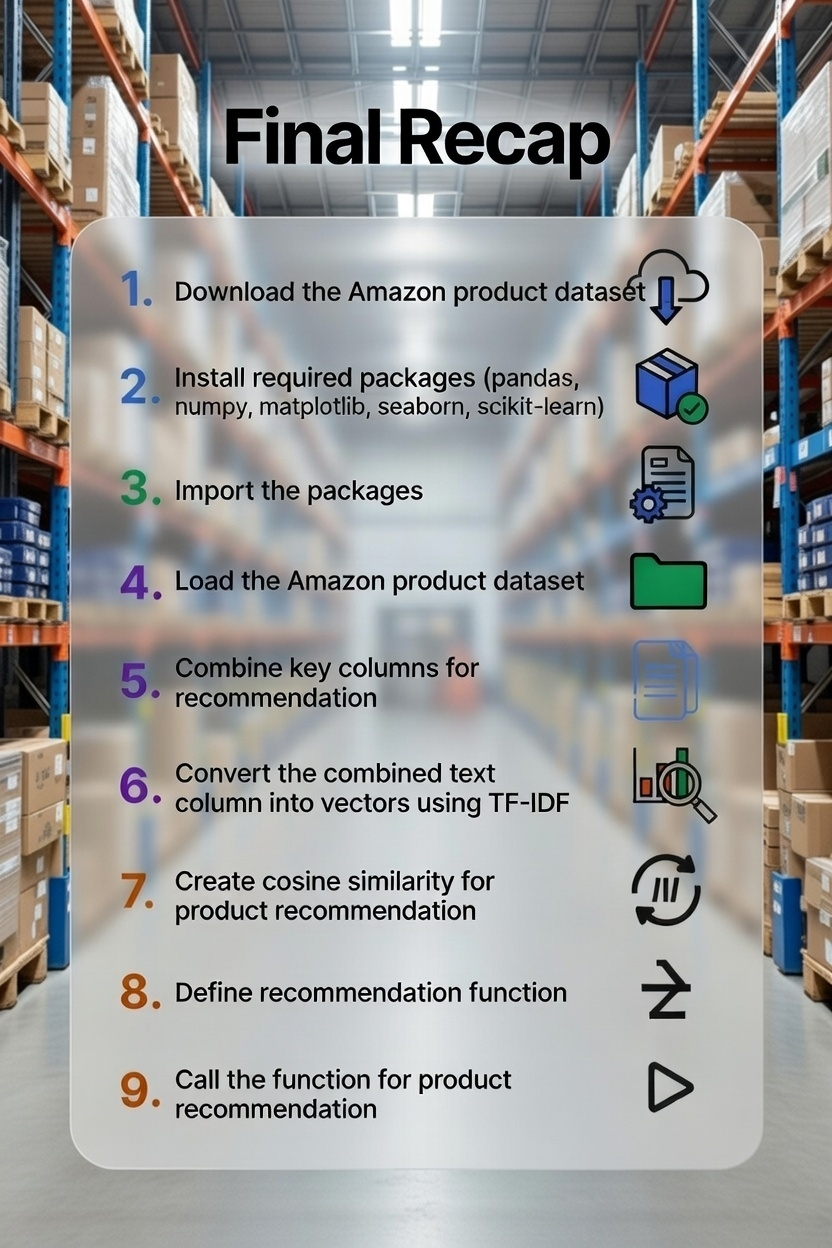